### Multi-class classification
> ### Fitting non-linear data to linear model
> ### Regularization
>> #### Underfitting    
>> #### Overfitting

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
from my_ml_tools.my_ml_plot import Plot_decision_multi_class
import warnings
warnings.simplefilter('ignore')

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
iris = load_iris()
features = iris.feature_names
targets = iris.target_names
X = iris.data[:, 2:]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

clf = LogisticRegression(C=100, random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f'Train score={clf.score(X_train, y_train):.3f}')
print(f'Test score={clf.score(X_test, y_test):.3f}')

Train score=0.964
Test score=0.947


In [3]:
# Probability of the first three samples in each of the three classes
clf.predict_proba(X_test[:5, :])

array([[7.91564944e-01, 2.08434997e-01, 5.92515050e-08],
       [7.72748371e-01, 2.27251606e-01, 2.26053151e-08],
       [7.91564944e-01, 2.08434997e-01, 5.92515050e-08],
       [8.57422213e-01, 1.42576839e-01, 9.47873976e-07],
       [1.44391612e-02, 9.83261355e-01, 2.29948430e-03]])

In [4]:
# Sum of probability = 1
clf.predict_proba(X_test[:5, :]).sum(axis=1)

array([1., 1., 1., 1., 1.])

In [5]:
# The most likely class that the first three samples belong to
clf.predict_proba(X_test[:5, :]).argmax(axis=1)

array([0, 0, 0, 0, 1])

In [6]:
# Predict one new data instance (input needs to be a 2Darray for sklearn)
clf.predict(X_test[-1, :].reshape(1, -1))

array([2])

### Regularization
#### $C$: Inverse of regularization strength
> Increase $C$: weaker regularization -> complex model -> could lead to overfitting   
> Decrease $C$: stronger regularization -> simple model -> could lead to underfitting

Test score = 0.32
Test score = 0.82
Test score = 0.95


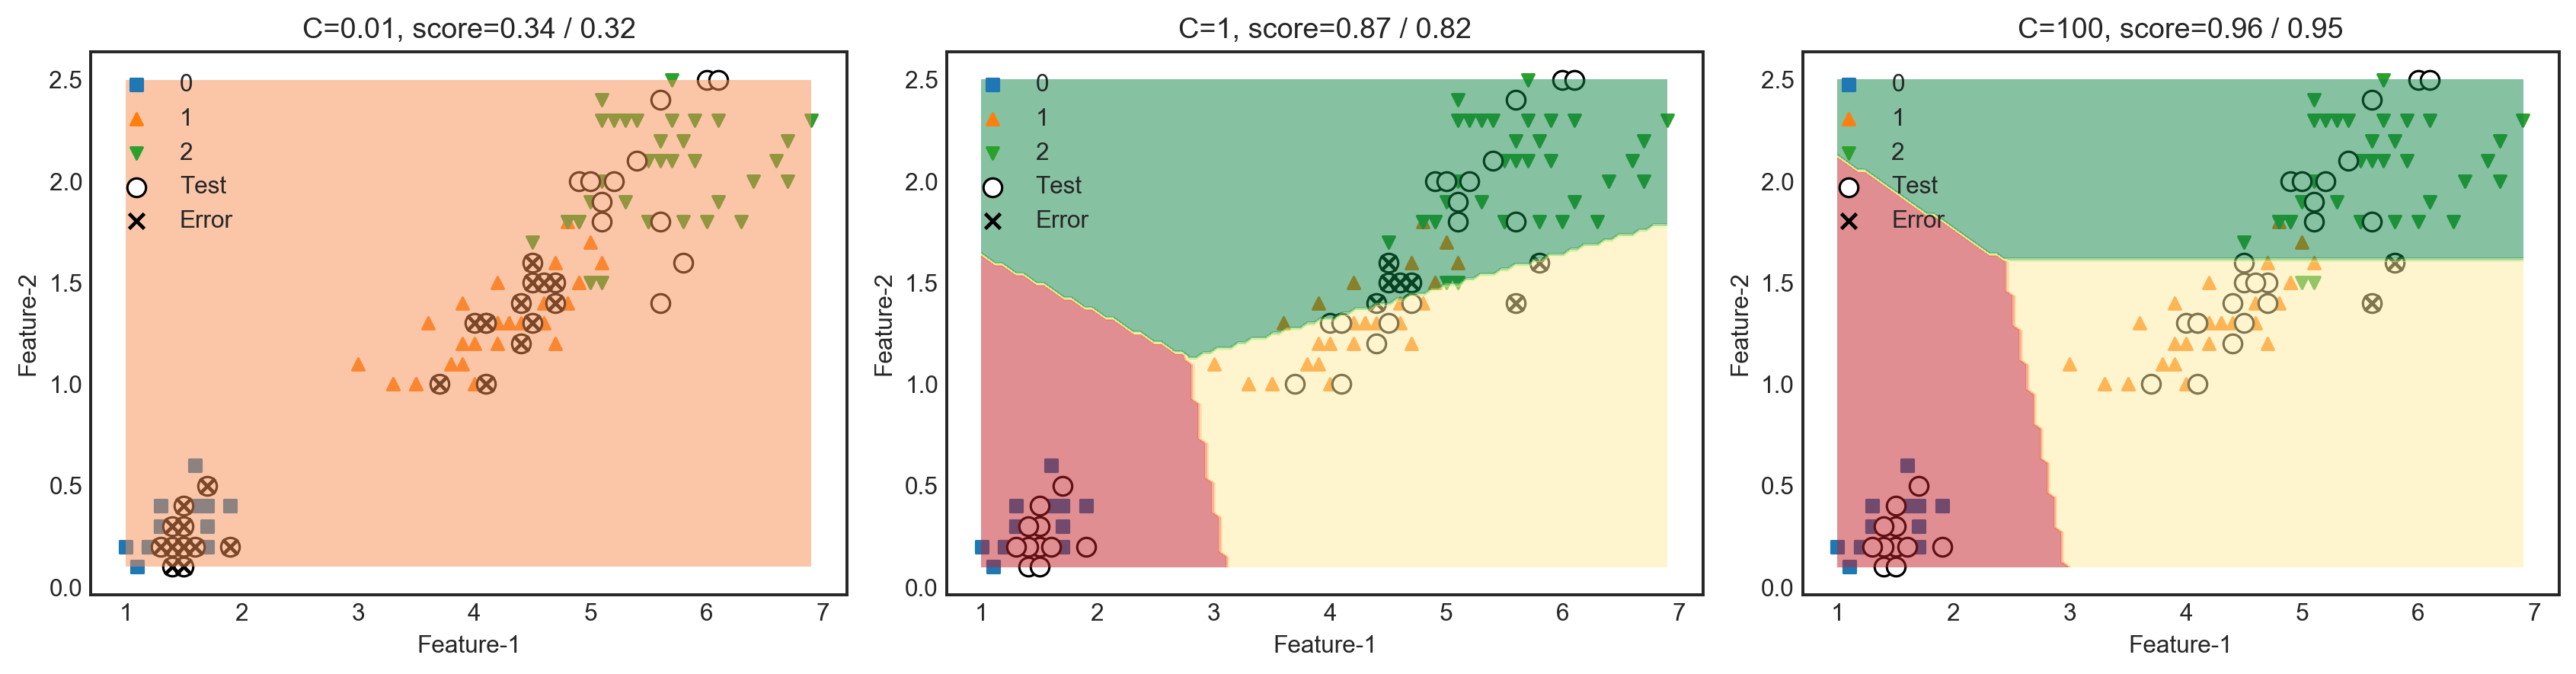

In [7]:
X, y = load_iris(return_X_y=True)
X = X[:, 2:]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

fig, axes = plt.subplots(1, 3, dpi=227, figsize=(15, 4))

for (ax, C) in zip(axes.ravel(), [0.01, 1, 100]):
    clf = LogisticRegression(C=C, random_state=0)
    clf.fit(X_train, y_train)
    Plot_decision_multi_class(clf, X_train, X_test, y_train, y_test, ax=ax)
    ax.set_title(f'C={C}, score={clf.score(X_train, y_train):.2f} / {clf.score(X_test, y_test):.2f}')
    
plt.tight_layout()

Test score = 0.37
Test score = 0.40
Test score = 0.40


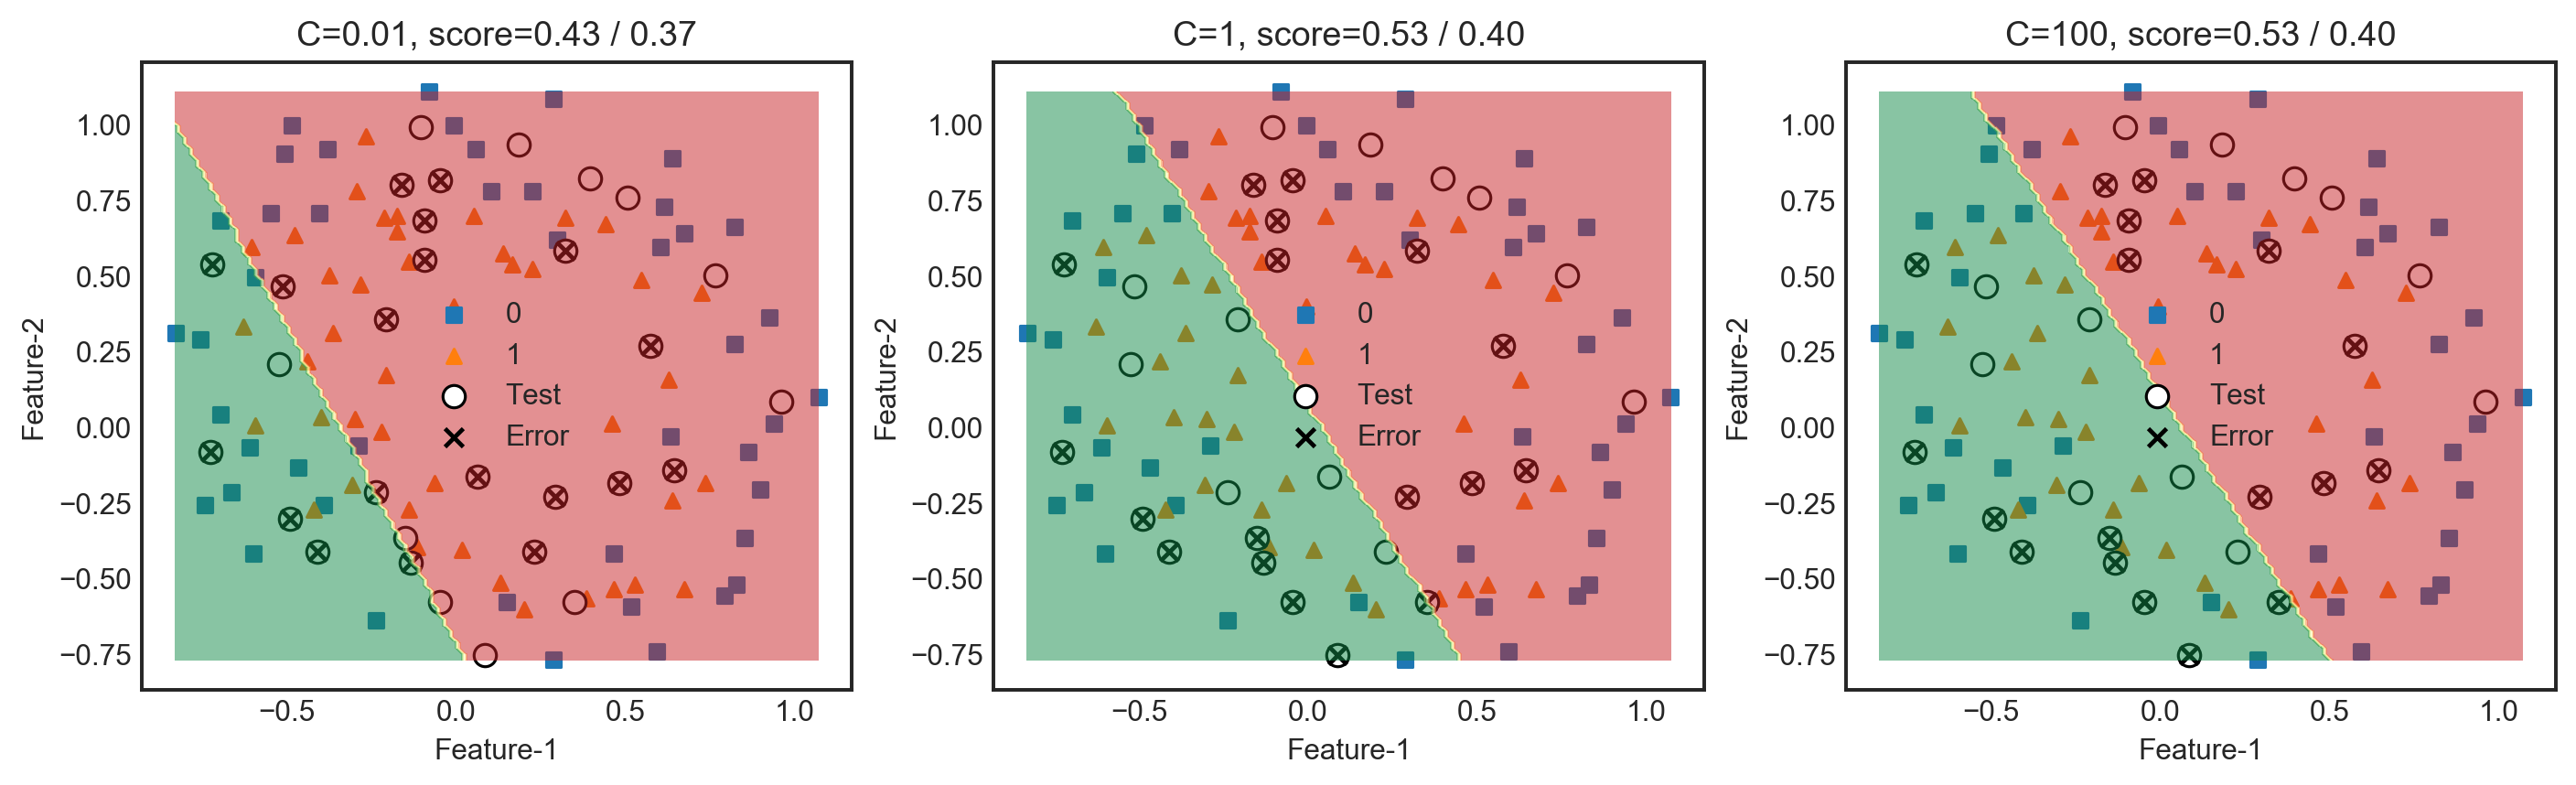

In [8]:
data = np.loadtxt('./data/ex2data2.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

fig, axes = plt.subplots(1, 3, dpi=227, figsize=(15, 4))

for (ax, C) in zip(axes.ravel(), [0.01, 1, 100]):
    clf = LogisticRegression(C=C, random_state=0)
    clf.fit(X_train, y_train)
    Plot_decision_multi_class(clf, X_train, X_test, y_train, y_test, ax=ax)
    ax.set_title(f'C={C}, score={clf.score(X_train, y_train):.2f} / {clf.score(X_test, y_test):.2f}')

### Fitting non-linear data to linear model
> #### We may generate the higher degree terms as the new features
> #### For example, generate $x_1^2$,  $x_1 x_2$,  $x_2^2$ from original $x_1$ and $x_2$


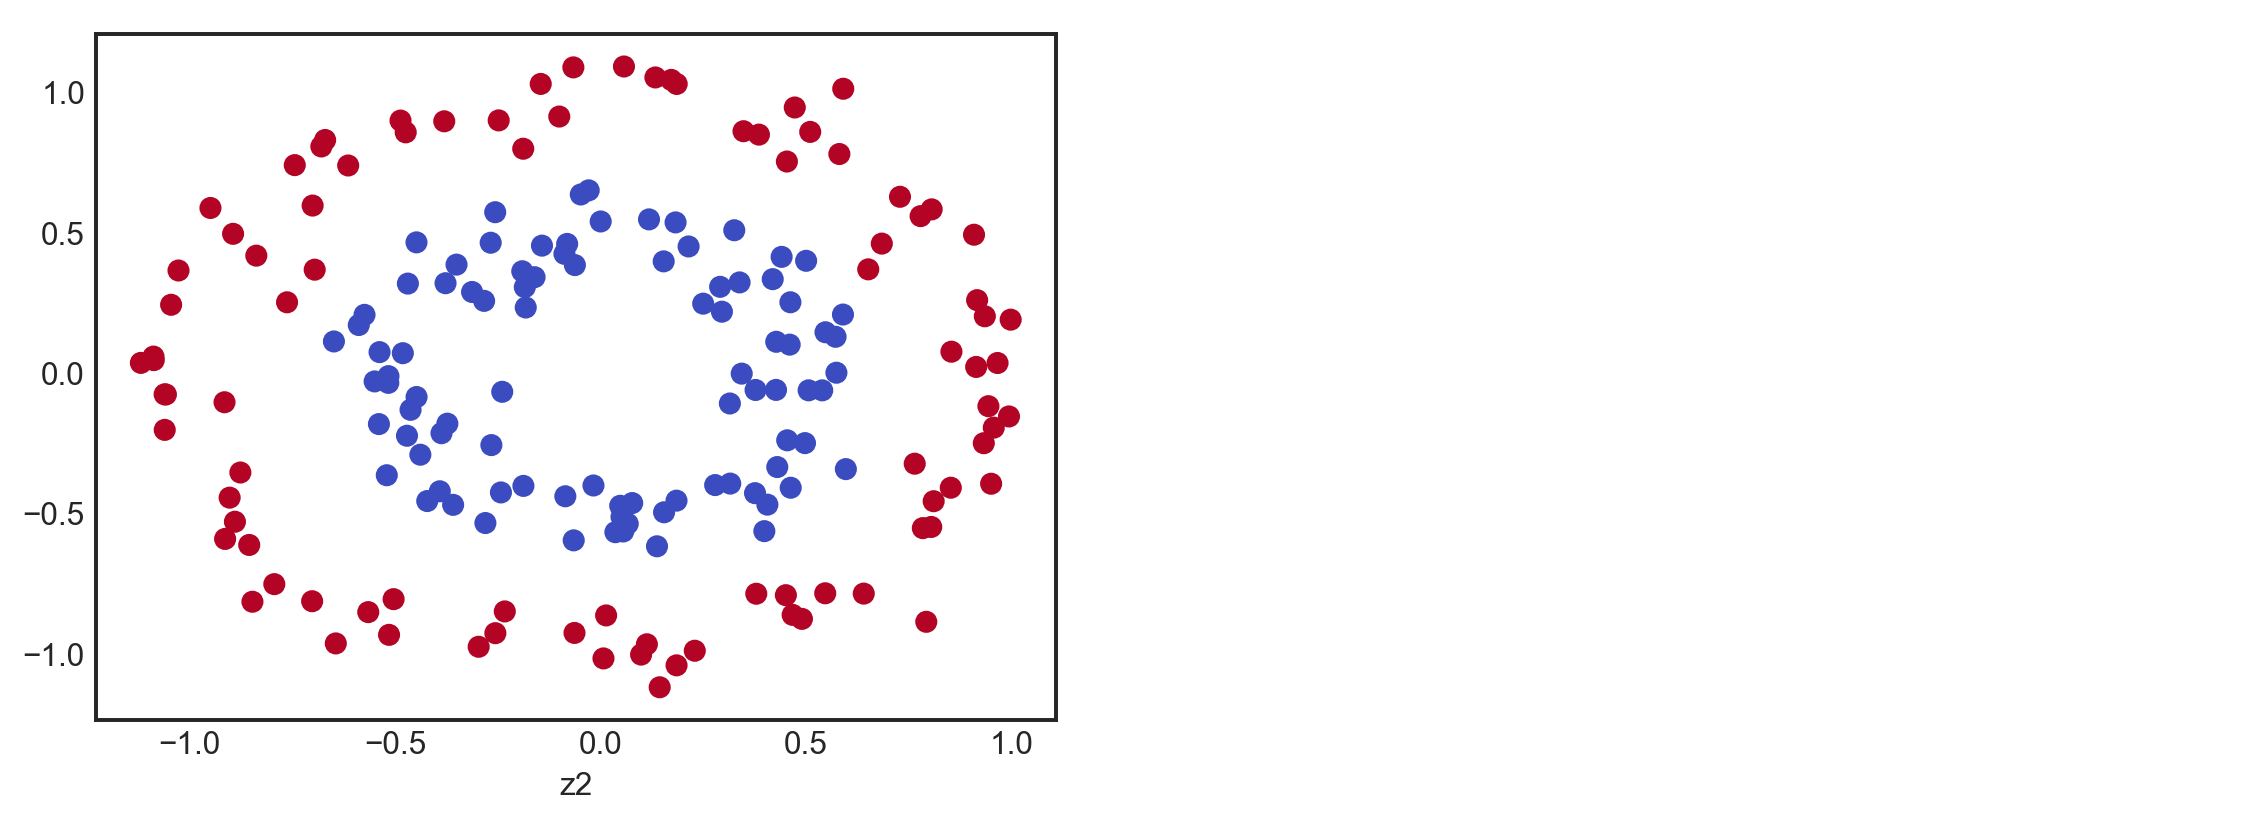

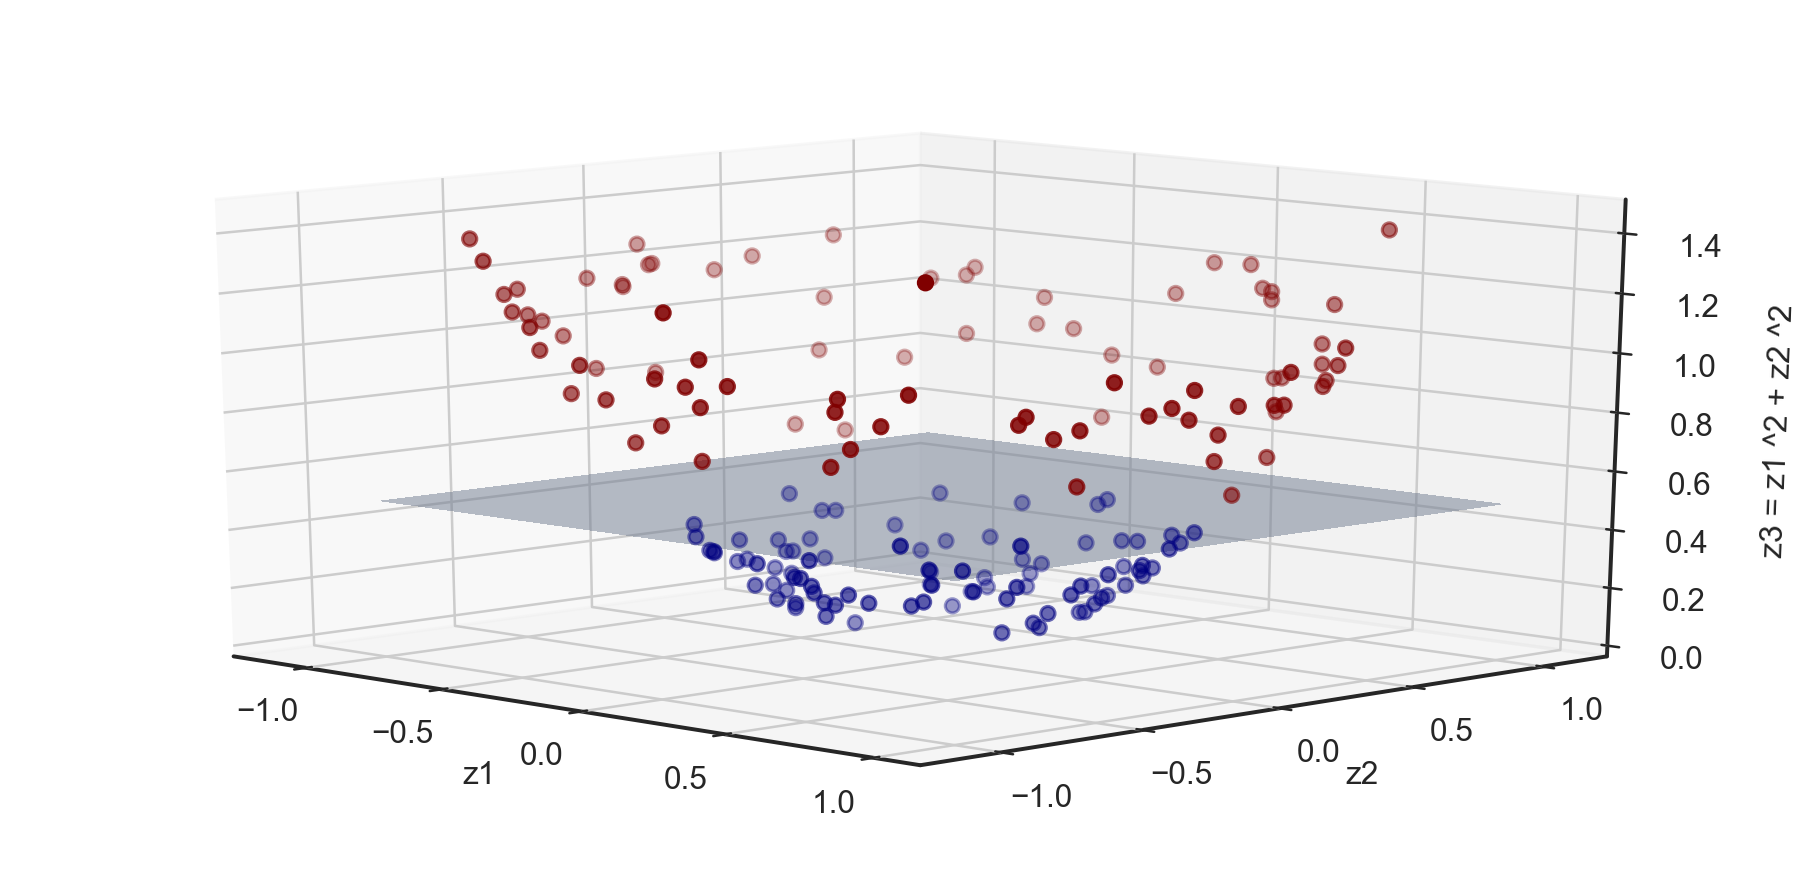

In [9]:
df = pd.read_csv('./data/svm_data_1.csv')
z1 = df['x1']
z2 = df['x2']
z3 = np.square(z1) + np.square(z2)
y = df['y']

fig, axes = plt.subplots(1, 2, dpi=227, figsize=(12, 4))

axes[0].scatter(z1, z2, c=y, cmap=plt.cm.coolwarm)
axes[0].set_xlabel('z1')
axes[0].set_xlabel('z2')
axes[1].axis('off')
plt.show()

from mpl_toolkits.mplot3d import Axes3D
plt.figure(dpi=227, figsize=(8, 4))
ax = plt.gca(projection='3d')
ax.scatter(z1, z2, z3, c=y, cmap=plt.cm.jet)
xx, yy = np.meshgrid(
    np.linspace(-1, 1, 100),
    np.linspace(-1, 1, 100)
)
ax.contourf(xx, yy, 0.5 * np.ones(xx.size).reshape(xx.shape), cmap=plt.cm.bone, alpha=0.5)
ax.set_xlabel('z1')
ax.set_ylabel('z2')
ax.set_zlabel('z3 = z1 ^2 + z2 ^2', rotation=90)
ax.view_init(elev=15, azim=-45)
plt.tight_layout()

### Target: $sin(2\pi x)$ + noise
> #### bias vs. variation
> #### underfitting vs. overfitting

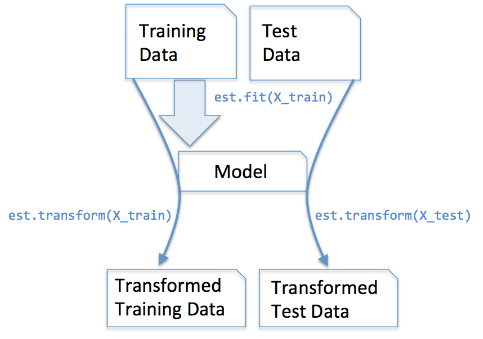

In [10]:
from IPython.display import Image
Image(filename = './charts/sklearn_API_2.png', width=400)

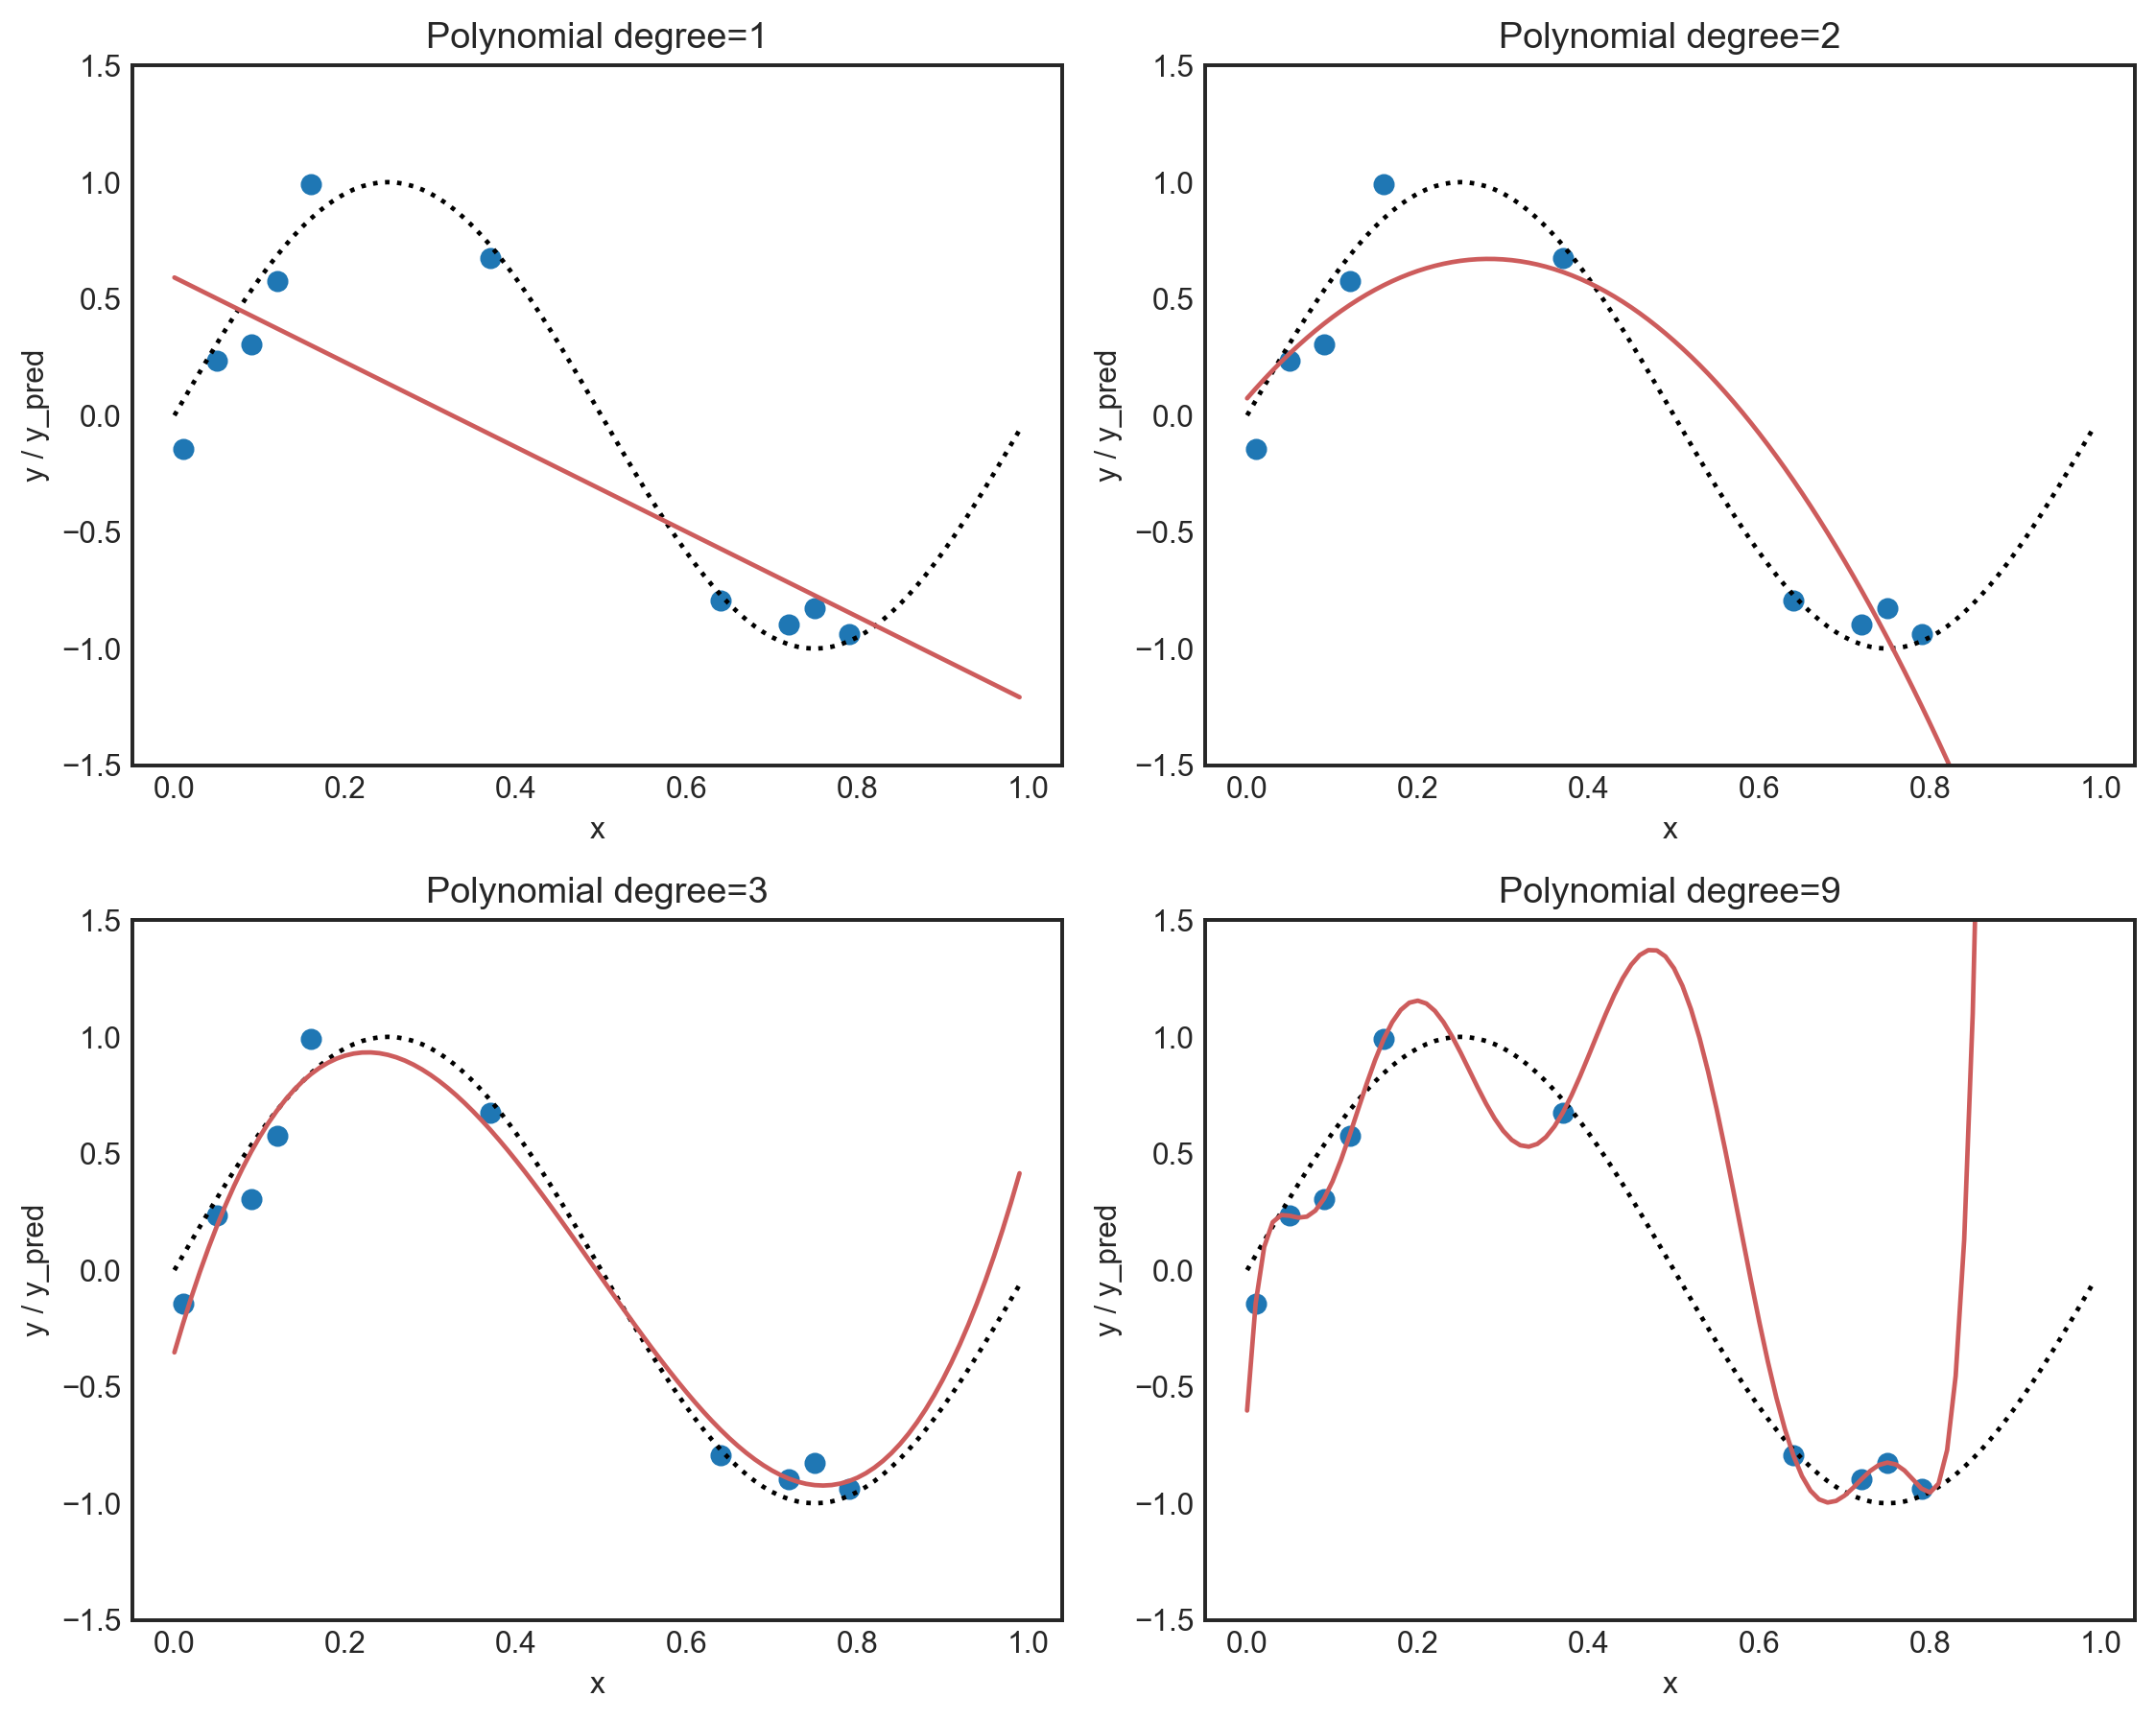

In [11]:
x0 = np.arange(100) / 100
y0 = np.sin(2 * np.pi * x0)

rng = np.random.RandomState(1)
x = rng.randint(0, 100, 10) / 100
y = np.sin(2 * np.pi * x) + rng.randn(10) / 10

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

fig, axes = plt.subplots(2, 2, dpi=227, figsize=(10, 8))

for (ax, d) in zip(axes.ravel(), [1, 2, 3, 9]):
    ax.plot(x0, y0, c='k', linestyle=':')
    ax.scatter(x, y)
    x1 = x.copy()
    poly = PolynomialFeatures(degree=d)
    poly.fit(x1.reshape(-1, 1))
    x1 = poly.transform(x1.reshape(-1, 1))
    lr = LinearRegression()
    lr.fit(x1, y)
    ax.plot(x0, lr.predict(poly.transform(x0.reshape(-1, 1))), c='indianred', label=d)
    
    ax.set_title('Polynomial degree=%d' % d)
    ax.set_ylim(-1.5, 1.5)
    ax.set_xlabel('x')
    ax.set_ylabel('y / y_pred')
plt.tight_layout()

Test score = 0.80
Test score = 0.77
Test score = 0.80


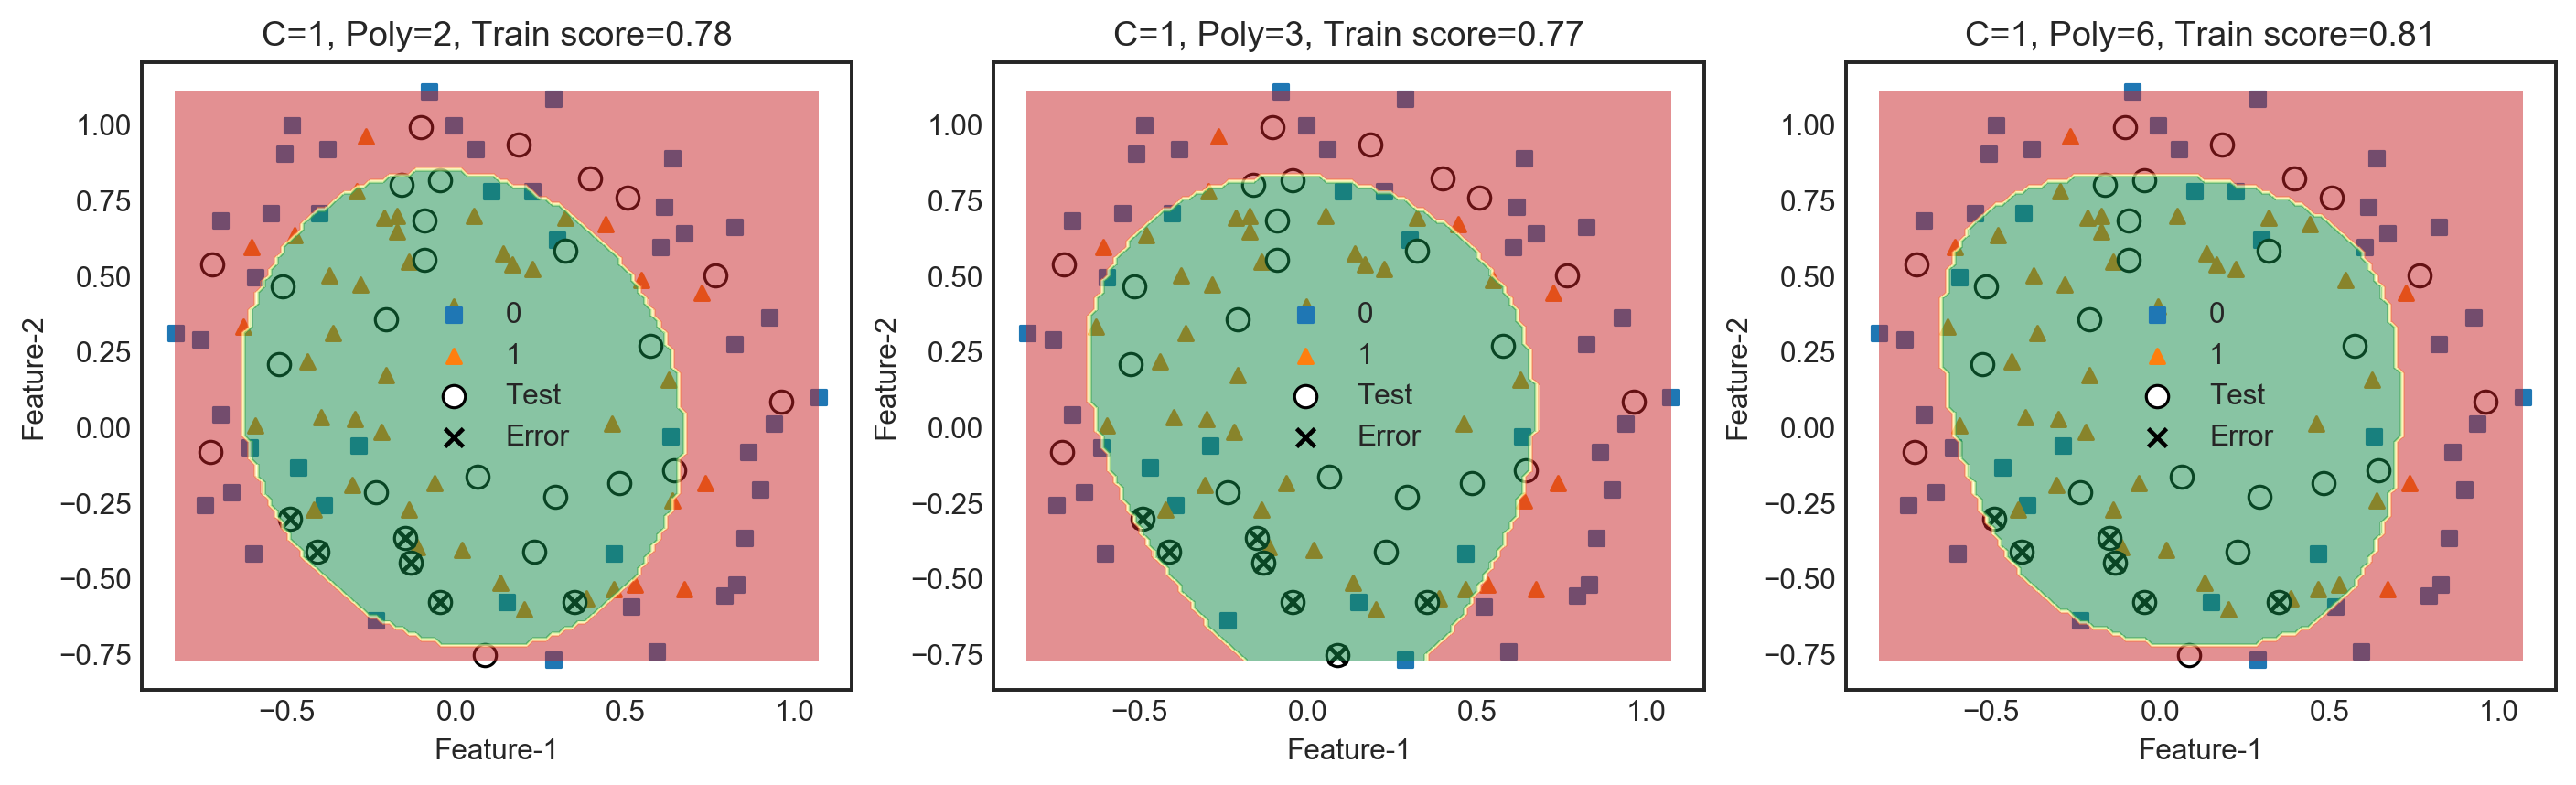

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

data = np.loadtxt('./data/ex2data2.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

fig, axes = plt.subplots(1, 3, dpi=227, figsize=(15, 4))

for (ax, degree) in zip(axes.ravel(), [2, 3, 6]):
    poly = PolynomialFeatures(degree=degree)
    poly.fit(X_train)
    X_train_poly = poly.transform(X_train)
    
    clf = LogisticRegression(C=1, random_state=0)
    clf.fit(X_train_poly, y_train)
    
    Plot_decision_multi_class(clf, X_train, X_test, y_train, y_test, ax=ax, poly=poly)
    ax.set_title(f'C=1, Poly={degree}, Train score={clf.score(X_train_poly, y_train):.2f}')

In [13]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X_poly = poly.transform(X)
poly.get_feature_names()

df = pd.DataFrame()
for idx, f in enumerate(poly.get_feature_names()):
    df[f] = X_poly[:, idx]
df['y'] = y

df.corr()['y'].sort_values().reset_index()

,index,y
0,x0^2,-0.389963
1,x1^2,-0.247882
2,x0 x1,-0.105044
3,x0,-0.074115
4,x1,0.005697
5,y,1.000000
6,1,NaN


#### C : float, default: 1.0
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

Test score = 0.50
Test score = 0.80
Test score = 0.87


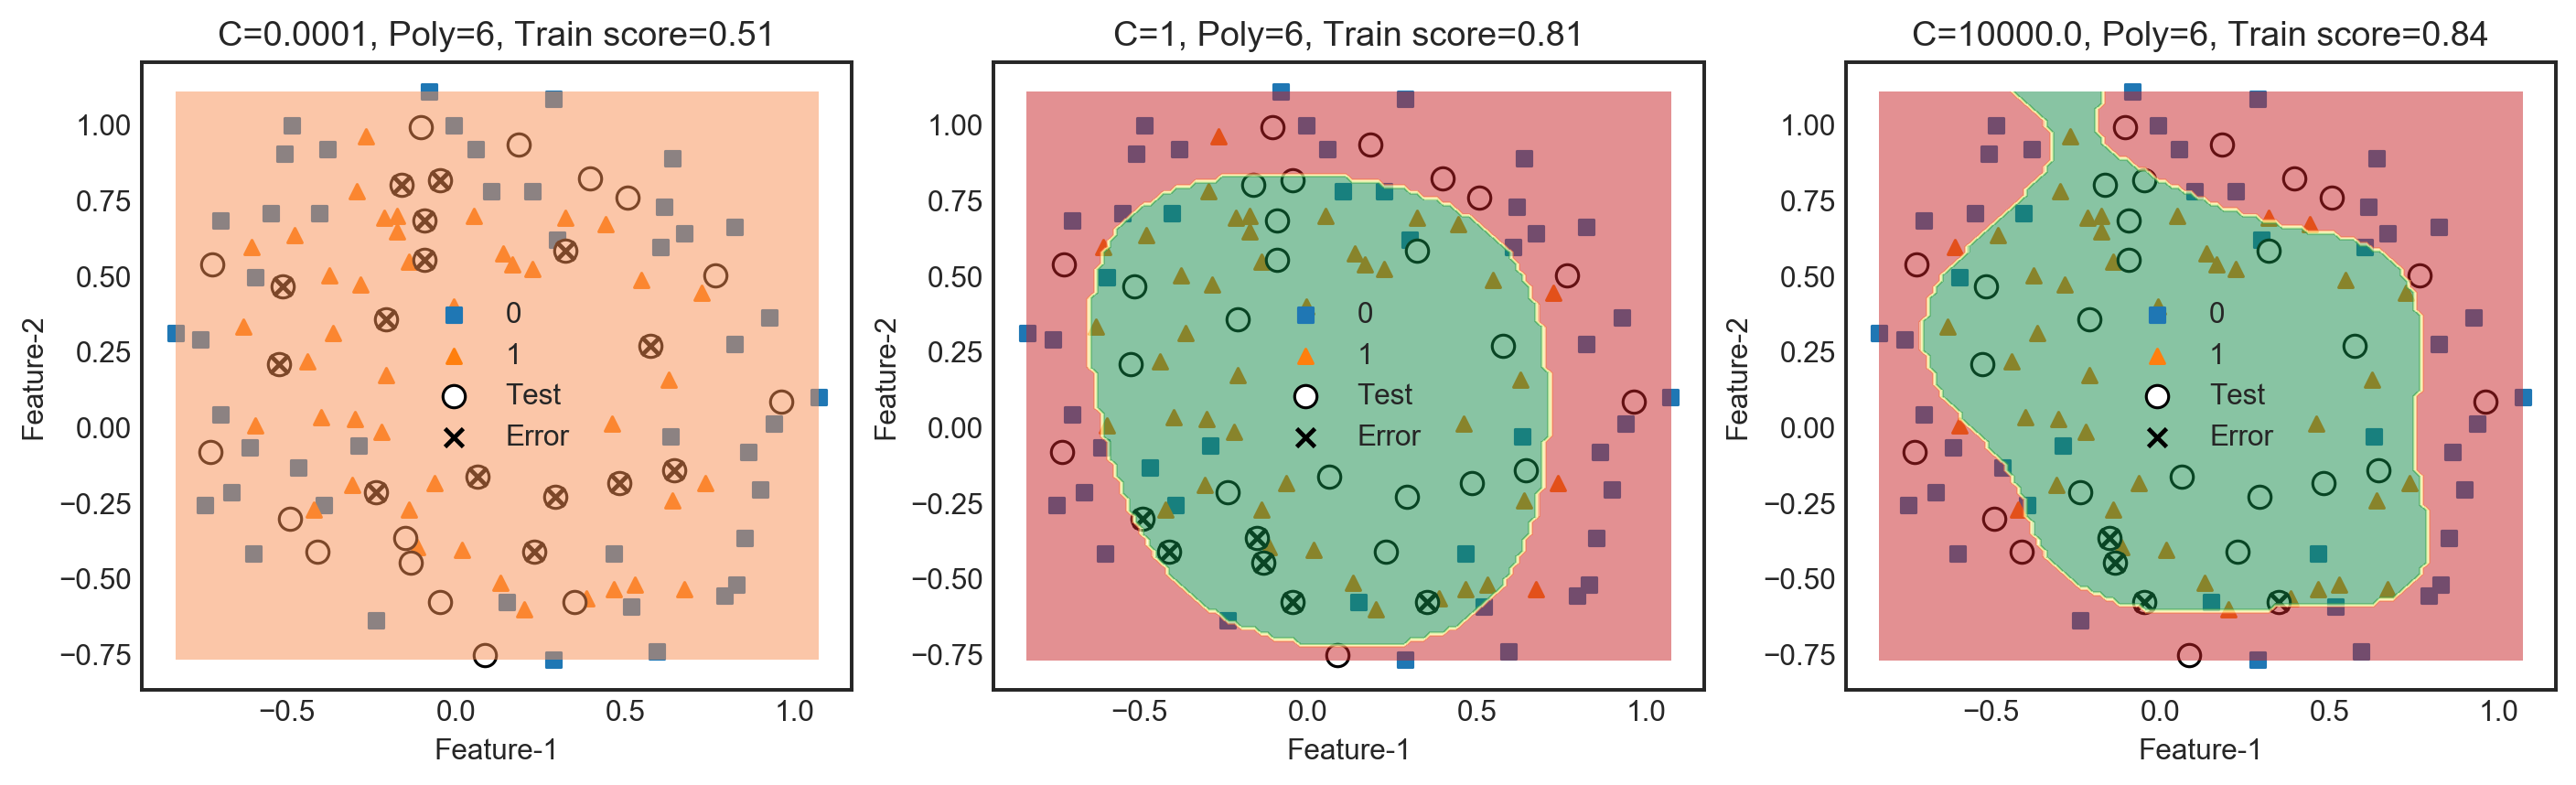

In [14]:
from sklearn.preprocessing import PolynomialFeatures

data = np.loadtxt('./data/ex2data2.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

fig, axes = plt.subplots(1, 3, dpi=227, figsize=(15, 4))

Cs = [1e-4, 1, 1e4]
degrees = [6, 6, 6]
for (ax, C, degree) in zip(axes.ravel(), Cs, degrees):
    poly = PolynomialFeatures(degree=degree)
    poly.fit(X_train)
    X_train_poly = poly.transform(X_train)
    clf = LogisticRegression(C=C, random_state=0)
    clf.fit(X_train_poly, y_train)
    Plot_decision_multi_class(clf, X_train, X_test, y_train, y_test, ax=ax, poly=poly)
    ax.set_title(f'C={C}, Poly={degree}, Train score={clf.score(X_train_poly, y_train):.2f}')